In [2]:
# Importing Needed Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [3]:
# Loading The dataset into DataFrame
df = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')

In [4]:
# Printing the first 5 instances
print(df.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [5]:
# Checking number of instances and columns
print("Shape of the dataframe:", df.shape)


Shape of the dataframe: (5171, 4)


In [6]:
# Checking for null values
print("Number of nulls in each column:")
print(df.isnull().sum())

Number of nulls in each column:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [7]:
# Replace null values with empty strings
df = df.fillna('')

In [8]:
# Checking value counts of target column
print("Value counts of label column:")
print(df['label'].value_counts())

Value counts of label column:
label
ham     3672
spam    1499
Name: count, dtype: int64


In [9]:
# Convert 'label' column values into numerical
df.replace({'label': {'ham': 1, 'spam': 0}}, inplace=True)

/tmp/ipykernel_33/1518690377.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'label': {'ham': 1, 'spam': 0}}, inplace=True)


In [10]:
#Drop the unimportant Columns
df.drop(['Unnamed: 0','label_num'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   int64 
 1   text    5171 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [12]:
# Separating the data into feature and label
x = df['text']
y = df['label']


In [13]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [14]:
# Feature Extraction: Convert text into numerical values using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [15]:
x_train_features = tfidf_vectorizer.fit_transform(x_train)
x_test_features = tfidf_vectorizer.transform(x_test)

In [16]:
# Training the model
model = LogisticRegression()

In [17]:
# Fitting the model on the training data
model.fit(x_train_features, y_train)

LogisticRegression()

In [18]:
# Evaluating the model on testing data
test_prediction = model.predict(x_test_features)
test_accuracy = accuracy_score(test_prediction, y_test)
print('Accuracy for Testing is:', test_accuracy * 100)


Accuracy for Testing is: 98.93719806763285


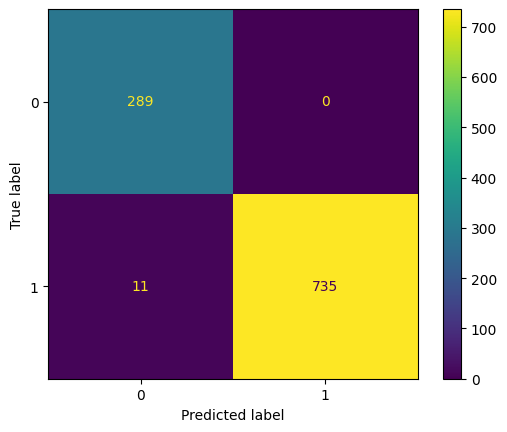

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, test_prediction)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
